In [1]:
# Date: 2018.07.22
# Author: Runyu Zhang

In [2]:
'''
This demo demonstrate how to train a one layer, unsupervised NMF and one layer, supervised NMF, and how to analyze and visualize the 
result.

In real implementation,  it might be helpful and of more flexibility to write your own training process 
instead of using the training functions in 'train.Ipynb'. This should not be too hard - you can simply
make a few lines change in the functions in 'train.Ipynb' to create your own training function.
'''

"\nThis demo demonstrate how to train a one layer, unsupervised NMF and one layer, supervised NMF, and how to analyze and visualize the \nresult.\n\nIn real implementation,  it might be helpful and of more flexibility to write your own training process \ninstead of using the training functions in 'train.Ipynb'. This should not be too hard - you can simply\nmake a few lines change in the functions in 'train.Ipynb' to create your own training function.\n"

In [3]:
# loading packages and functions
import torch
import numpy as np
from matplotlib import pyplot as plt
import Ipynb_importer
from deep_nmf import Deep_NMF, Energy_Loss_Func
from lsqnonneg_module import LsqNonneg
from train import train_unsupervised, train_supervised
#
import torch.nn as nn
from writer import Writer

importing Jupyter notebook from deep_nmf.ipynb
importing Jupyter notebook from lsqnonneg_module.ipynb
importing Jupyter notebook from train.ipynb
importing Jupyter notebook from writer.ipynb


In [4]:
# data loading session
from data_loading import X_BOW as X
from data_loading import Label_BOW as label
from data_loading import Y_BOW as Y
from data_loading import L_BOW as L

importing Jupyter notebook from data_loading.ipynb


In [5]:
# set the network parameters
m = X.shape[1]
k1 = 20
k2 = 15
k3 = 10
c = 9

In [267]:
# unsupervised case,one layer
net = Deep_NMF([m, 9])
loss_func = Energy_Loss_Func()
X_input = X*1000
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 200, lr = 1000)

epoch =  10 
 tensor(177.3386, dtype=torch.float64)
epoch =  20 
 tensor(176.9230, dtype=torch.float64)


KeyboardInterrupt: 

In [160]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1_lst = history_unsupervised.get('A1')
S1_lst = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')

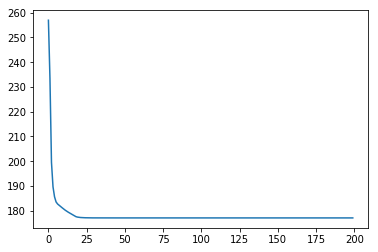

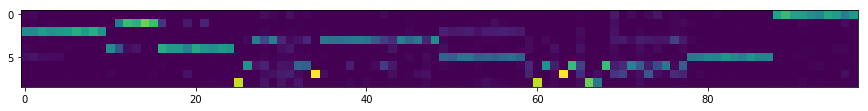

In [161]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')
# plot the heatmap for S1
history_unsupervised.plot_tensor('S1', [-1])

In [49]:
'''
The following code demonstrate the process of training a supervised one-layer NMF.

The training for supervised NMF is a little bit tricky here, I am not sure if this is the best way to do this. Here I am using
different learning rate for the NMF layer(lsqnonneg layer) and the classification layer. What's more, in the same epoch, the
NMF layer and the classification layer are trained separately, the NMF will do one gradient update in one epoch, and the
classification layer will do thirty. See more detail in the function 'train_supervised' in 'train.Ipynb'
'''

"\nThe following code demonstrate the process of training a supervised one-layer NMF.\n\nThe training for supervised NMF is a little bit tricky here, I am not sure if this is the best way to do this. Here I am using\ndifferent learning rate for the NMF layer(lsqnonneg layer) and the classification layer. What's more, in the same epoch, the\nNMF layer and the classification layer are trained separately, the NMF will do one gradient update in one epoch, and the\nclassification layer will do thirty. See more detail in the function 'train_supervised' in 'train.Ipynb'\n"

In [12]:
# supervised case
net = Deep_NMF([m, 9], 9)
net.linear.weight.data = 1e-3*torch.randn(9,9,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 100000,classification_type = 'L2')
X_input = X*1000
history_supervised = train_supervised(net, X_input, loss_func, Y, epoch = 100, lr_nmf = 5000, lr_classification = 0.01, weight_decay = 1)

epoch =  1 
 tensor(2732.4452, dtype=torch.float64)
epoch =  2 
 tensor(2052.2004, dtype=torch.float64)
epoch =  3 
 tensor(1878.3530, dtype=torch.float64)
epoch =  4 
 tensor(1736.6712, dtype=torch.float64)
epoch =  5 
 tensor(1667.4902, dtype=torch.float64)
epoch =  6 
 tensor(1619.2050, dtype=torch.float64)
epoch =  7 
 tensor(1581.0884, dtype=torch.float64)
epoch =  8 
 tensor(1547.2746, dtype=torch.float64)
epoch =  9 
 tensor(1514.8750, dtype=torch.float64)
epoch =  10 
 tensor(1480.4264, dtype=torch.float64)
epoch =  11 
 tensor(1437.7029, dtype=torch.float64)
epoch =  12 
 tensor(1372.2653, dtype=torch.float64)
epoch =  13 
 tensor(1259.7785, dtype=torch.float64)
epoch =  14 
 tensor(1078.8656, dtype=torch.float64)
epoch =  15 
 tensor(902.8130, dtype=torch.float64)
epoch =  16 
 tensor(833.0851, dtype=torch.float64)
epoch =  17 
 tensor(873.9664, dtype=torch.float64)
epoch =  18 
 tensor(960.6563, dtype=torch.float64)
epoch =  19 
 tensor(819.8213, dtype=torch.float64)
epoch =

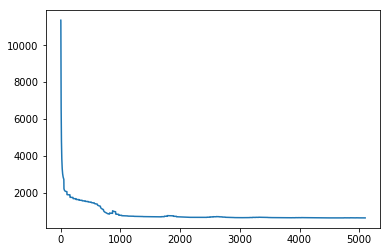

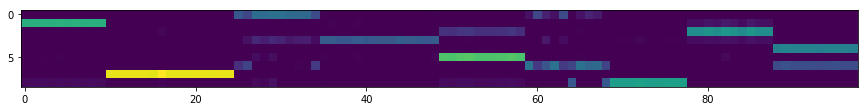

In [13]:
# plotting the loss curve
history_supervised.plot_scalar('loss')
# plotting the heatmap of S1
history_supervised.plot_tensor('S1', [-1])
# getting the history for different varialbes
A1_lst = history_supervised.get('A1')
S1_lst = history_supervised.get('S1')
grad_A1_lst = history_supervised.get('grad_A1')
B_lst = history_supervised.get('weight')
grad_B_lst = history_supervised.get('grad_weight')

In [14]:
S_lst, pred = net(X)
torch.argmax(pred, dim = 1) != label

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=torch.uint8)

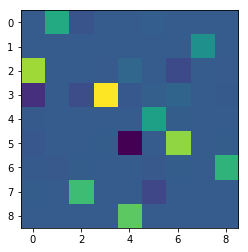

In [15]:
plt.imshow(net.linear.weight.data)
plt.show()

In [11]:
m = X.shape[1]
n = X.shape[0]
k = 9
net = Deep_NMF([m,9])
loss_func = Energy_Loss_Func()
X_input = 1000*X

In [205]:
net = Deep_NMF([m, 20])
loss_func = Energy_Loss_Func()
X_input = X*1000
epoch = 400
lr = 1000
for i in range(epoch):
    net.zero_grad()
    S_lst = net(X_input)
    loss = loss_func(net, X_input, S_lst)
    loss.backward()
    history.add_scalar('loss', loss.data)
    for l in range(net.depth - 1):
        A = net.lsqnonneglst[l].A
        # record history
        history.add_tensor('A'+str(l+1), A.data)
        history.add_tensor('grad_A'+str(l+1), A.grad.data)
        history.add_tensor('S' + str(l+1), S_lst[l].data)
        # projection gradient descent
        A.data = A.data.sub_(lr*A.grad.data)
        A.data = A.data.clamp(min = 0)
    if (i+1)%10 == 0:
        print('epoch = ', i+1, '\n', loss.data)

epoch =  10 
 tensor(139.1894, dtype=torch.float64)
epoch =  20 
 tensor(136.7749, dtype=torch.float64)
epoch =  30 
 tensor(136.5464, dtype=torch.float64)
epoch =  40 
 tensor(136.4583, dtype=torch.float64)
epoch =  50 
 tensor(136.3804, dtype=torch.float64)
epoch =  60 
 tensor(136.2334, dtype=torch.float64)
epoch =  70 
 tensor(136.1693, dtype=torch.float64)
epoch =  80 
 tensor(136.1667, dtype=torch.float64)
epoch =  90 
 tensor(136.1666, dtype=torch.float64)
epoch =  100 
 tensor(136.1666, dtype=torch.float64)
epoch =  110 
 tensor(136.1666, dtype=torch.float64)
epoch =  120 
 tensor(136.1666, dtype=torch.float64)


KeyboardInterrupt: 

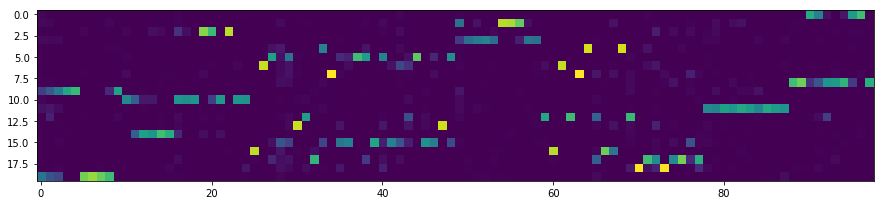

In [206]:
fig = plt.figure(figsize = (15,105))
plt.imshow(S_lst[0].data.t())
plt.show()

In [83]:
class L21_Norm(nn.Module):
    def __init__(self):
        super(L21_Norm, self).__init__()
        self.criterion = nn.MSELoss()
    def forward(self, S):
        total = 0
        n = S.shape[1]
        for i in range(n):
            total += torch.norm(S[:,i])
        return total

In [84]:
criterion = L21_Norm()
criterion(S_lst[0])

tensor(0.1799, dtype=torch.float64)

In [220]:
net = Deep_NMF([m, 20])
loss_func = Energy_Loss_Func()
X_input = X*1000
epoch = 100
lr = 100
history = Writer()
for i in range(epoch):
    net.zero_grad()
    S_lst = net(X_input)
    loss = loss_func(net, X_input, S_lst) + 0.05*criterion(S_lst[0])
    loss.backward()
    history.add_scalar('loss', loss.data)
    for l in range(net.depth - 1):
        A = net.lsqnonneglst[l].A
        # record history
        # projection gradient descent
        A.data = A.data.sub_(lr*A.grad.data)
        A.data = A.data.clamp(min = 0)
    if (i+1)%10 == 0:
        print('epoch = ', i+1, '\n', loss.data)

epoch =  10 
 tensor(223.1349, dtype=torch.float64)
epoch =  20 
 tensor(206.0051, dtype=torch.float64)
epoch =  30 
 tensor(198.9112, dtype=torch.float64)
epoch =  40 
 tensor(196.6342, dtype=torch.float64)
epoch =  50 
 tensor(195.7168, dtype=torch.float64)
epoch =  60 
 tensor(195.0718, dtype=torch.float64)
epoch =  70 
 tensor(194.6028, dtype=torch.float64)
epoch =  80 
 tensor(194.2446, dtype=torch.float64)
epoch =  90 
 tensor(193.9560, dtype=torch.float64)
epoch =  100 
 tensor(193.7209, dtype=torch.float64)


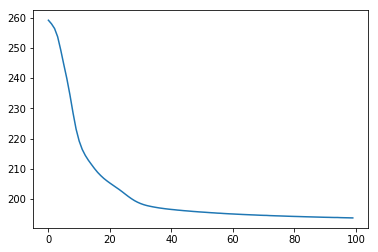

In [221]:
history.plot_scalar('loss')

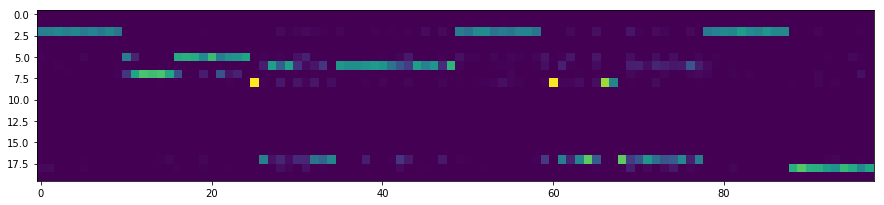

In [222]:
fig = plt.figure(figsize = (15,105))
plt.imshow(S_lst[0].data.t())
plt.show()

In [224]:
torch.sum(S_lst[0],dim = 0)

tensor([  0.0141,   0.0012,  97.4985,   0.0000,   0.0306,  45.2992,
         66.4292,  31.5699,  27.8000,   0.0000,   0.0068,   0.0000,
          0.0000,   0.0146,   0.0413,   0.0082,   0.0000,  59.2383,
         46.4427,   0.0000], dtype=torch.float64)